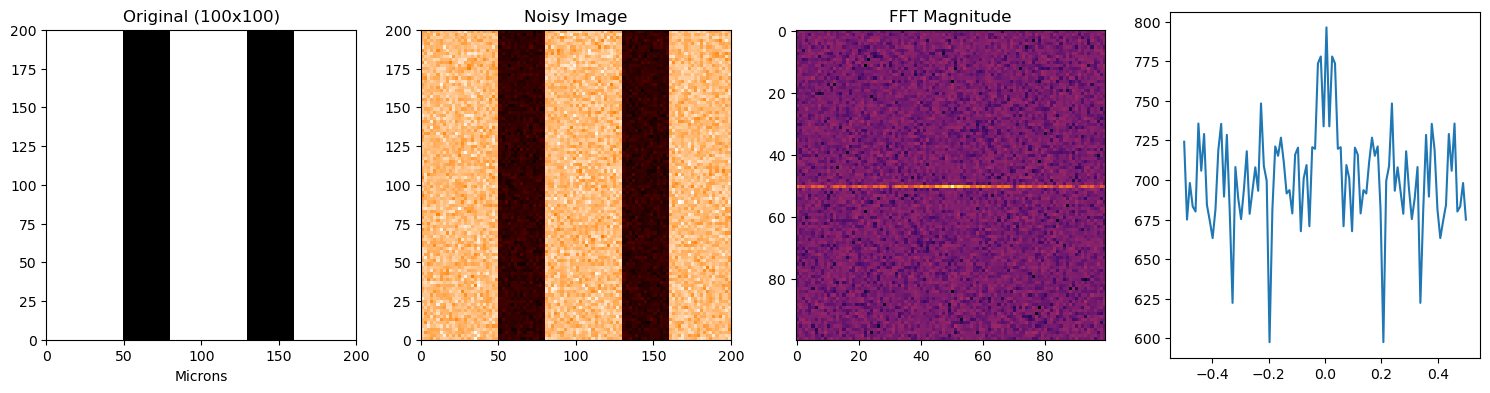

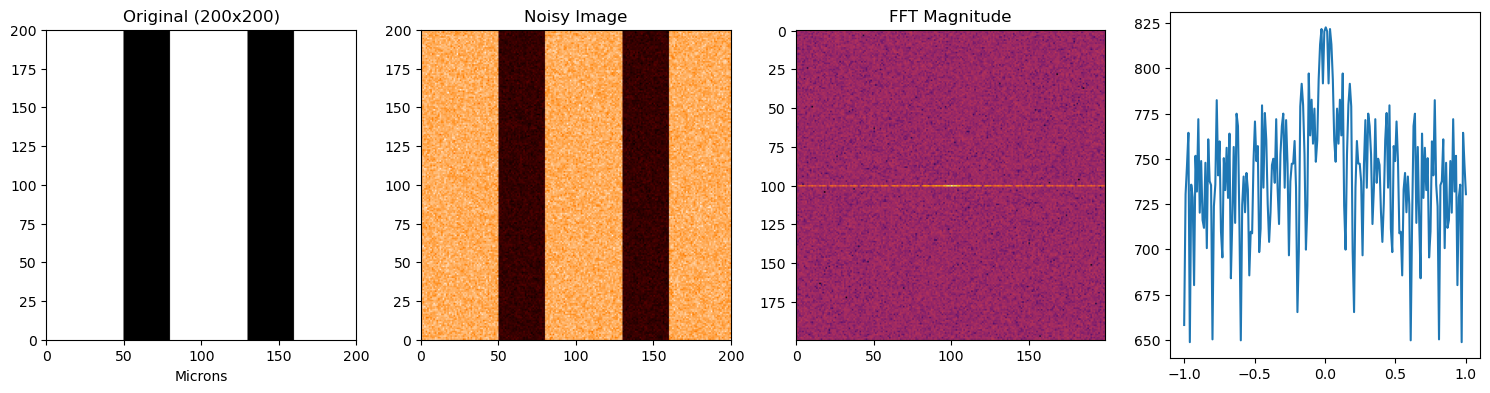

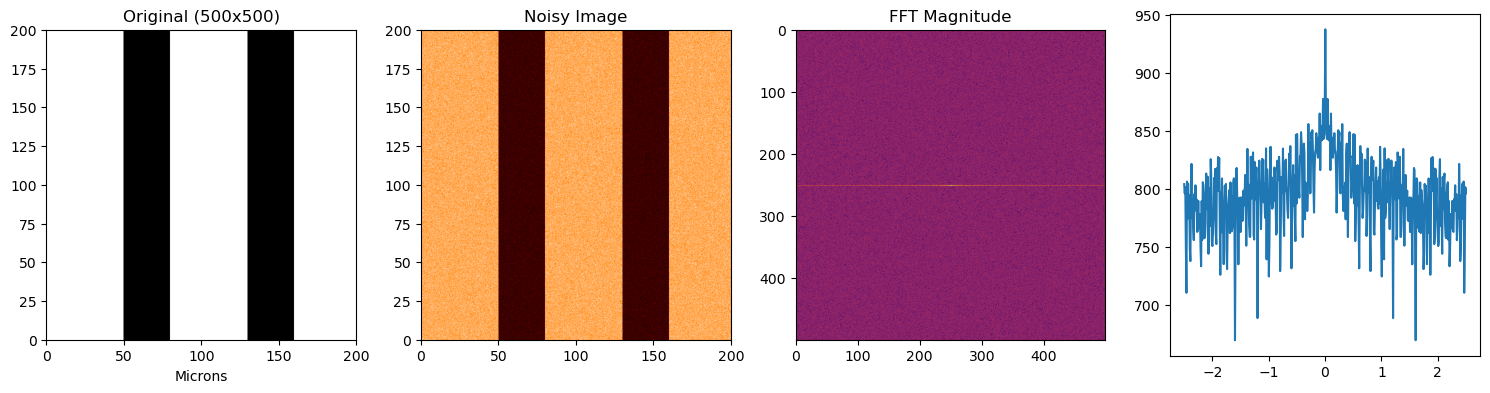

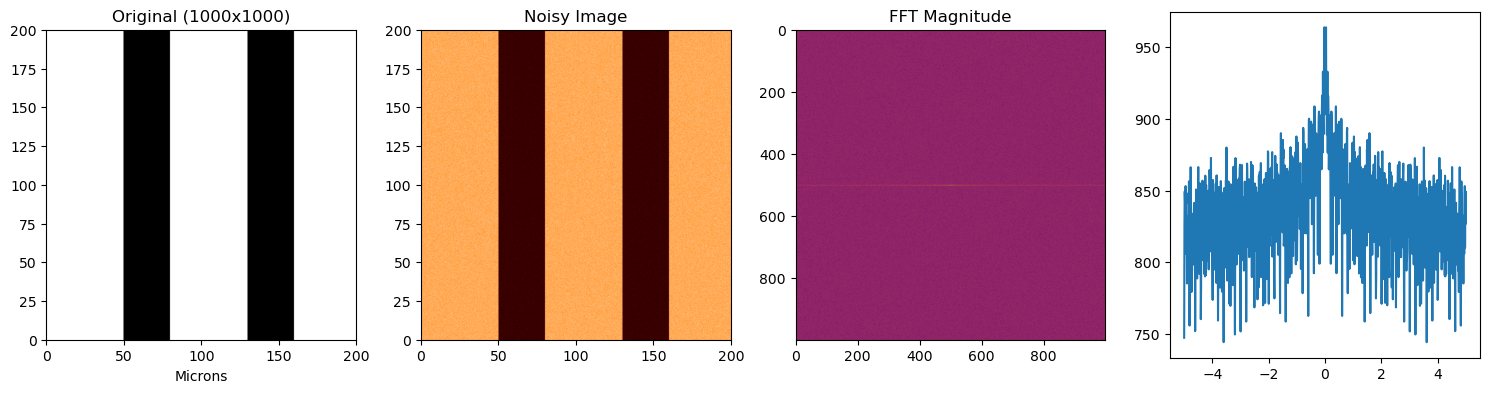

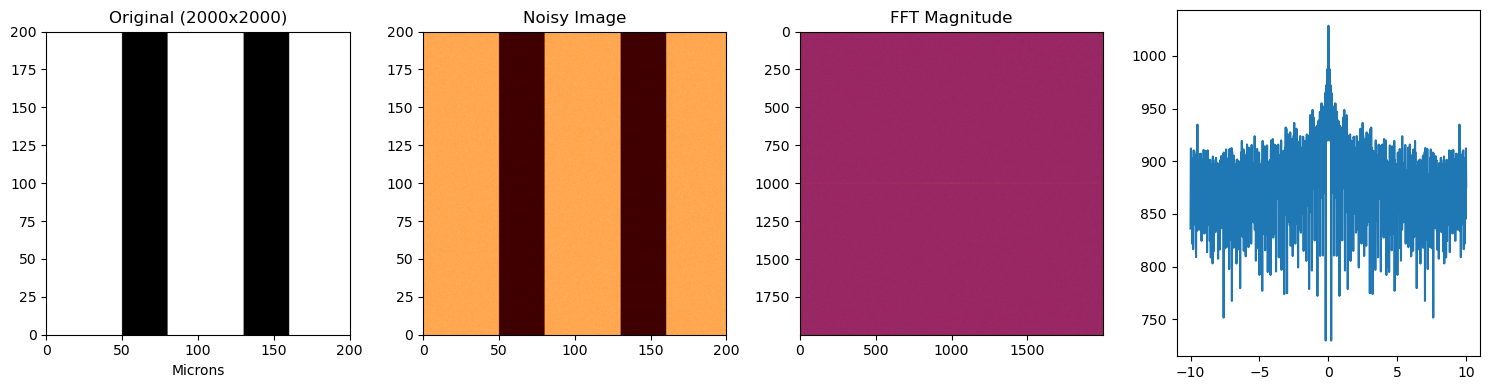

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Area = 200                  
pixel_list = [100, 200, 500, 1000 , 2000 ]

bright_width = 30
dark_width = 50
cycle_length = bright_width + dark_width

noise_level = 1000

for Pixels in pixel_list:
    x = np.linspace(0, Area, Pixels)
    y = np.linspace(0, Area, Pixels)
    X, Y = np.meshgrid(x, y)

    pattern_mask = (X % cycle_length) < bright_width

    Image = np.zeros((Pixels, Pixels))
    Image[pattern_mask] = 10000
    Image[~pattern_mask] = 500
    
    noise = np.random.normal(0, noise_level, Image.shape)
    Image_noise = Image + noise

    # Image_noise -= np.mean(Image_noise) # Remove DC component
        
    F = np.fft.fft2(Image_noise)
    Fshift = np.fft.fftshift(F)
    magnitude_spectrum = 20 * np.log(np.abs(Fshift) + 1)
    
    plt.figure(figsize=(15, 4))

    plt.subplot(141)
    plt.imshow(Image, cmap='gray', extent=[0, Area, 0, Area])
    plt.title(f'Original ({Pixels}x{Pixels})')
    plt.xlabel('Microns')

    plt.subplot(142)
    plt.imshow(Image_noise, cmap='gist_heat', extent=[0, Area, 0, Area])
    plt.title('Noisy Image')

    plt.subplot(143)
    plt.imshow(magnitude_spectrum, cmap='inferno')
    plt.title('FFT Magnitude')

    plt.subplot(144)
    # Make frequency axis in cycles per micron
    plt.plot(np.linspace(-Pixels/Area, +Pixels/Area, magnitude_spectrum.shape[1]), np.sum(magnitude_spectrum[magnitude_spectrum.shape[0]//2 - 1: magnitude_spectrum.shape[0]//2 + 2, :], axis=0))
    # plt.axis([0, 2, None, None])
    plt.tight_layout()
    plt.show()



In [4]:
# --- ส่วนที่ปรับปรุง: คำนวณ Bandwidth ให้ปลอดภัย (กันภาพดำ) ---
df_min = 1 
# ใช้ค่าเดิมของคุณ (0.01) หรือค่าที่ปลอดภัยกว่า แล้วแต่เลือกครับ
# แนะนำ: ถ้าใช้ 0.01 แล้วภาพไม่ดำ ก็ใช้ 0.01 ได้เลย
safe_bandwidth = max(0.01, 3 * df_min) 

np.random.seed(42)

# =================================================
# LOOP OVER RESOLUTIONS
# =================================================
for i, Pixels in enumerate(pixel_list):

    # 1. Spatial Image
    x = np.linspace(0, Area, Pixels)
    y = np.linspace(0, Area, Pixels)
    X, Y = np.meshgrid(x, y)

    pattern_mask = (X % cycle_length) < bright_width
    Image = np.zeros((Pixels, Pixels))
    Image[pattern_mask] = 10000
    Image[~pattern_mask] = 500

    noise = np.random.normal(0, noise_level, Image.shape)
    Image_noise = Image + noise

    # 2. FFT
    F = np.fft.fft2(Image_noise)
    Fshift = np.fft.fftshift(F)

    # 3. Frequency grid
    dx = Area / Pixels
    fx = np.fft.fftfreq(Pixels, d=dx)
    fy = np.fft.fftfreq(Pixels, d=dx)
    FX, FY = np.meshgrid(fx, fy)
    
    # --- จุดแก้ไขที่ 1: ต้อง Shift ทั้ง FX และ FY ---
    FX = np.fft.fftshift(FX)
    FY = np.fft.fftshift(FY)  # <--- บรรทัดนี้สำคัญมากสำหรับการกรอง 2D

    # 4. Band-pass Filter (อัปเกรดเป็น 2D Filter)
    # กรองเอาเฉพาะความถี่ X ที่ต้องการ และบังคับให้แกน Y เรียบ (ใกล้ 0)
    bandpass_mask = (
        (np.abs(FX) > (f0 - safe_bandwidth)) &
        (np.abs(FX) < (f0 + safe_bandwidth)) & 
        (np.abs(FY) < safe_bandwidth)         # <--- จุดแก้ไขที่ 2: เพิ่มเงื่อนไขนี้
    )

    # 5. Apply filter + IFFT
    F_filtered = Fshift * bandpass_mask
    img_back = np.fft.ifft2(np.fft.ifftshift(F_filtered))
    img_back = np.real(img_back)

    # 6. Visualization
    plt.figure(figsize=(15, 4))

    plt.subplot(131)
    plt.imshow(bandpass_mask, cmap='gray')
    plt.title(f'Pixels={Pixels}x{Pixels}\n2D Band-pass Mask')
    plt.axis('off')

    plt.subplot(132)
    mag_spec = 20 * np.log(np.abs(F_filtered) + 1)
    plt.imshow(mag_spec, cmap='inferno')
    plt.title('Filtered Spectrum')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(img_back, cmap='gray', extent=[0, Area, 0, Area])
    plt.title('Filtered Image')
    plt.xlabel('Microns')

    plt.tight_layout()
    plt.show()

NameError: name 'f0' is not defined

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Area = 200                  
pixel_list = [100, 200, 500, 1000 , 2000 ]

cases = [(10,70), (30,50), (50,30), (70,10)]
bright_width, dark_width = case
cycle_length = bright_width + dark_width

noise_level = 1000

for Pixels in pixel_list:
    x = np.linspace(0, Area, Pixels)
    y = np.linspace(0, Area, Pixels)
    X, Y = np.meshgrid(x, y)

    pattern_mask = (X % cycle_length) < bright_width

    Image = np.zeros((Pixels, Pixels))
    Image[pattern_mask] = 10000
    Image[~pattern_mask] = 500
    
    noise = np.random.normal(0, noise_level, Image.shape)
    Image_noise = Image + noise

    # Image_noise -= np.mean(Image_noise) # Remove DC component
        
    F = np.fft.fft2(Image_noise)
    Fshift = np.fft.fftshift(F)
    magnitude_spectrum = 20 * np.log(np.abs(Fshift) + 1)
    
    plt.figure(figsize=(15, 4))

    plt.subplot(141)
    plt.imshow(Image, cmap='gray', extent=[0, Area, 0, Area])
    plt.title(f'Original ({Pixels}x{Pixels})')
    plt.xlabel('Microns')

    plt.subplot(142)
    plt.imshow(Image_noise, cmap='gist_heat', extent=[0, Area, 0, Area])
    plt.title('Noisy Image')

    plt.subplot(143)
    plt.imshow(magnitude_spectrum, cmap='inferno')
    plt.title('FFT Magnitude')

    plt.subplot(144)
    # Make frequency axis in cycles per micron
    plt.plot(np.linspace(-Pixels/Area, +Pixels/Area, magnitude_spectrum.shape[1]), np.sum(magnitude_spectrum[magnitude_spectrum.shape[0]//2 - 1: magnitude_spectrum.shape[0]//2 + 2, :], axis=0))
    # plt.axis([0, 2, None, None])
    plt.tight_layout()
    plt.show()



NameError: name 'case' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ... (ส่วนกำหนดตัวแปร Area, pixel_list ฯลฯ เหมือนเดิม) ...

for Pixels in pixel_list:
    x = np.linspace(0, Area, Pixels)
    y = np.linspace(0, Area, Pixels)
    X, Y = np.meshgrid(x, y)

    pattern_mask = (X % cycle_length) < bright_width

    Image = np.zeros((Pixels, Pixels))
    Image[pattern_mask] = 10000
    Image[~pattern_mask] = 500
    
    noise = np.random.normal(0, noise_level, Image.shape)
    Image_noise = Image + noise

    # Image_noise -= np.mean(Image_noise) # Remove DC component
        
    F = np.fft.fft2(Image_noise)
    Fshift = np.fft.fftshift(F)
    magnitude_spectrum = 20 * np.log(np.abs(Fshift) + 1)
    
    plt.figure(figsize=(15, 4))

    # --- ส่วนที่แก้ไข ---
    plt.subplot(141)
    # ใช้ cmap='gray_r' เพื่อให้ค่า 500=ขาว และ 10000=ดำ
    im = plt.imshow(Image, cmap='gray_r', extent=[0, Area, 0, Area])
    # เพิ่ม Colorbar เพื่อบอกสเกลสี
    plt.colorbar(im, fraction=0.046, pad=0.04)
    # แก้ไขชื่อกราฟเพื่อระบุความหมายสี
    plt.title(f'Original ({Pixels}x{Pixels})\nWhite: 500, Black: 10000')
    plt.xlabel('Microns')
    # ------------------

    plt.subplot(142)
    plt.imshow(Image_noise, cmap='gist_heat', extent=[0, Area, 0, Area])
    plt.title('Noisy Image')

    plt.subplot(143)
    plt.imshow(magnitude_spectrum, cmap='inferno')
    plt.title('FFT Magnitude')

    plt.subplot(144)
    # Make frequency axis in cycles per micron
    plt.plot(np.linspace(-Pixels/Area, +Pixels/Area, magnitude_spectrum.shape[1]), np.sum(magnitude_spectrum[magnitude_spectrum.shape[0]//2 - 1: magnitude_spectrum.shape[0]//2 + 2, :], axis=0))
    # plt.axis([0, 2, None, None])
    plt.tight_layout()
    plt.show()

NameError: name 'pixel_list' is not defined